<a href="https://colab.research.google.com/github/Sepren/Data_Analytic/blob/main/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0%2C_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D0%B2%D0%BE%D0%BA%D1%83%D0%BF%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выборка и генеральная совокупность

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(1234)
%matplotlib inline

Пример формирования генеральной совокупность с нормальным распоряжением

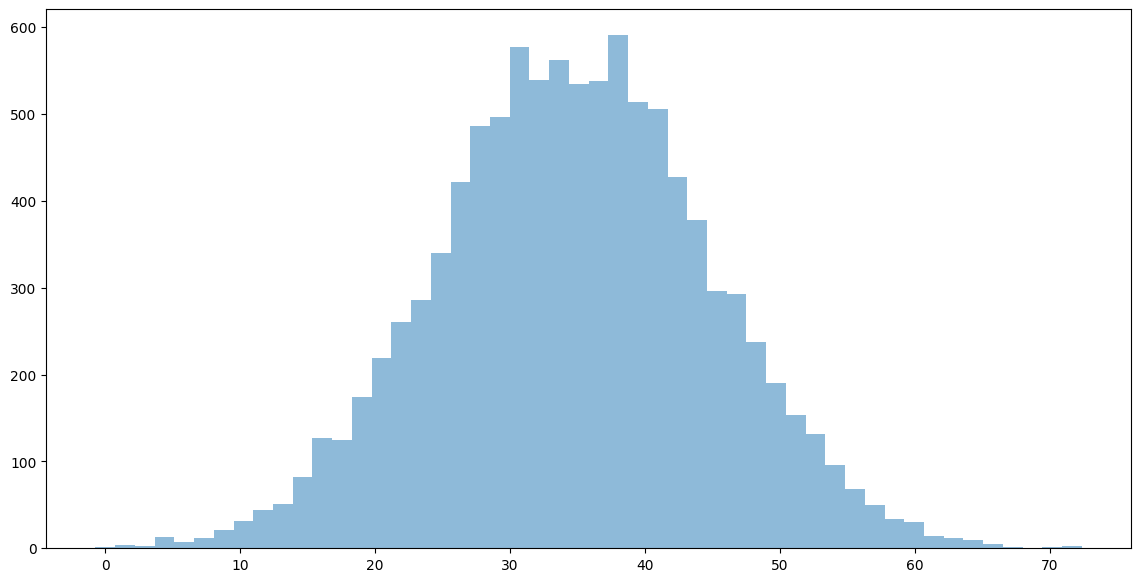

array([31.19962144, 33.25019061, 26.86635373, ..., 33.97695062,
       43.70472974, 32.34771008])

In [29]:
norm_rv1 = stats.norm(loc=35, scale=10)
# scale - стандартное отклонение
# loc - среднее

# генерируем случайные значения из распределения norm_rv1
gen_pop = norm_rv1.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.5)
plt.show()
gen_pop

Также рассмотрим пример с логнормальным распредением

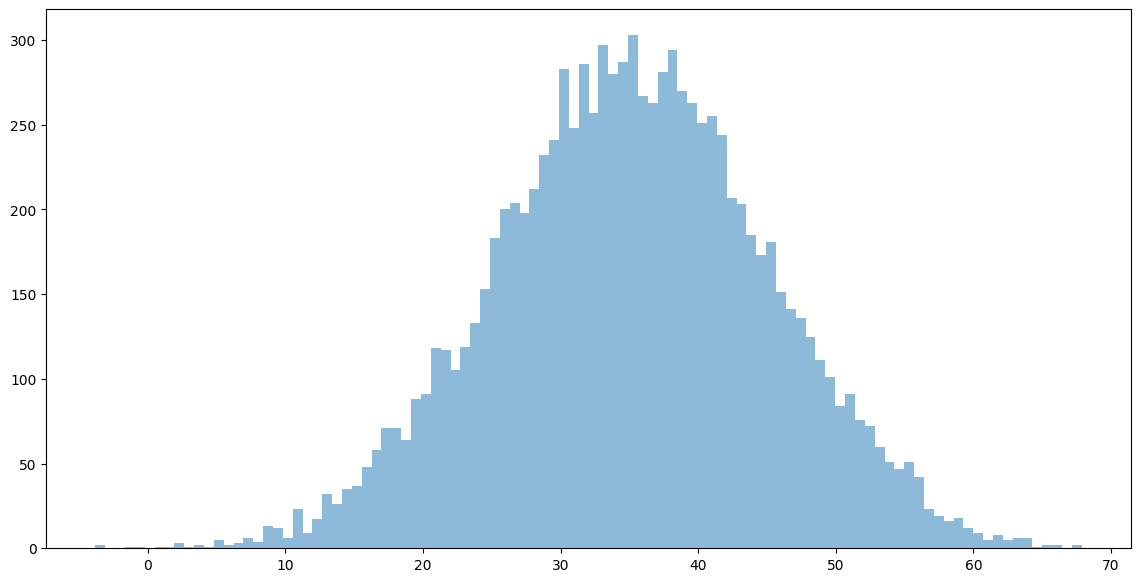

In [ ]:
ln_distrib = stats.lognorm(0.5, loc=25, scale=10)
gen_pop_ln = ln_distrib.rvs(size=10000)

fig = plt.figure(figsize=(14, 7))
ax1 = plt.subplot(111)
plt.hist(gen_pop, 100, alpha=0.5)
plt.show()

# Описательная статистика

**Меры концентрации**

**Медиана** - это такое число выборки, что ровно половина из элементов выборки больше него, а другая половина меньше него

In [33]:
median = np.median([85, 90, 78, 92, 88, 85, 76, 98, 94, 87])
median_ln = np.median(gen_pop_ln)
median

87.5

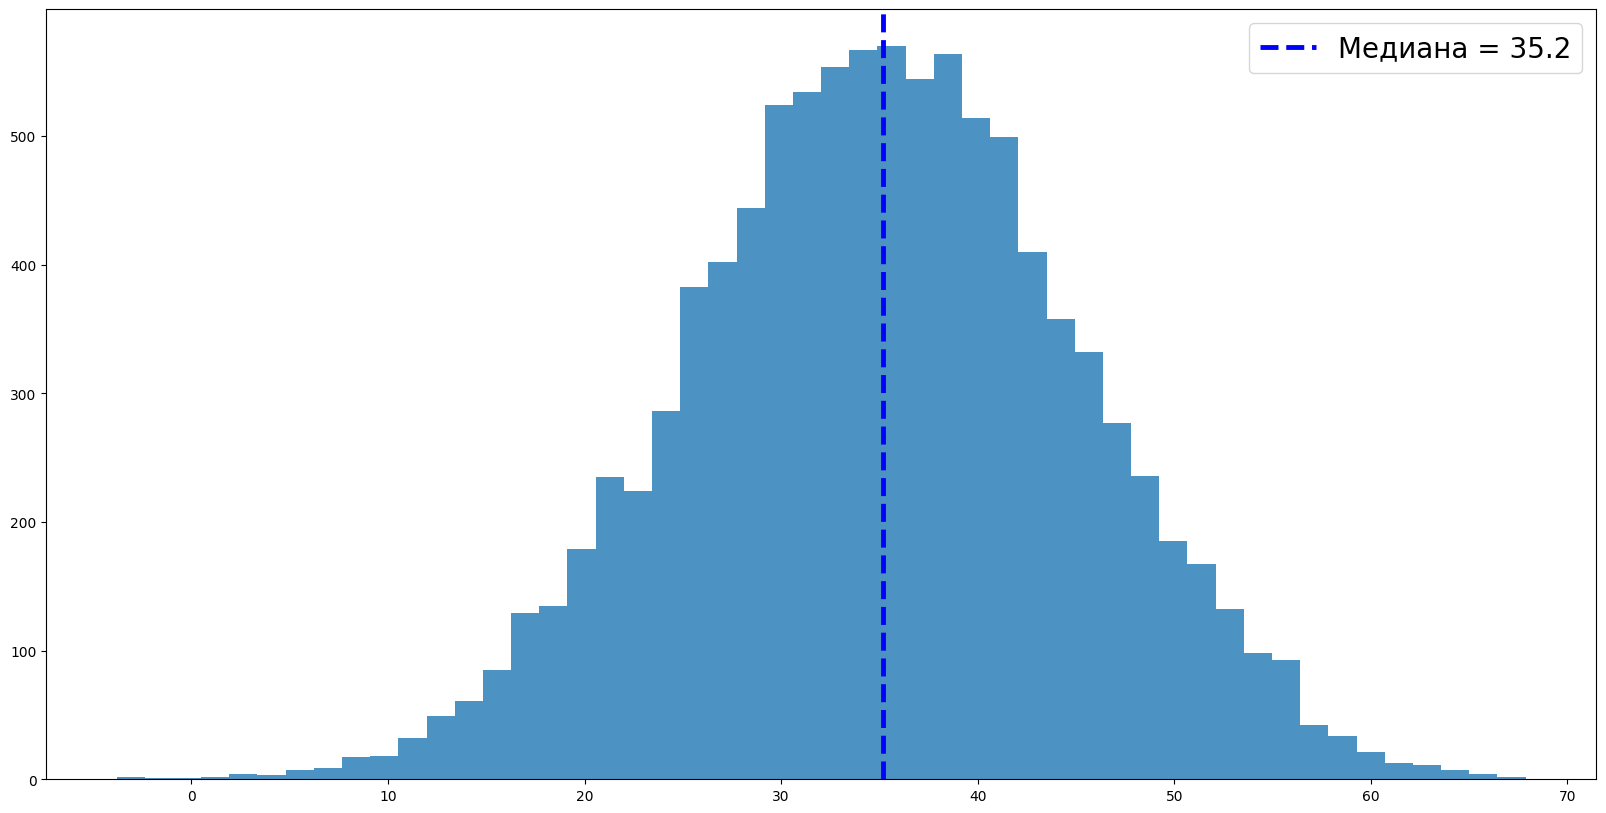

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(median, label=('Медиана = ' + str(round(median, 1))),
                    color='blue', linestyle='dashed', linewidth=3.5)

ax1.legend(handles=[line1], fontsize=20)
plt.show()

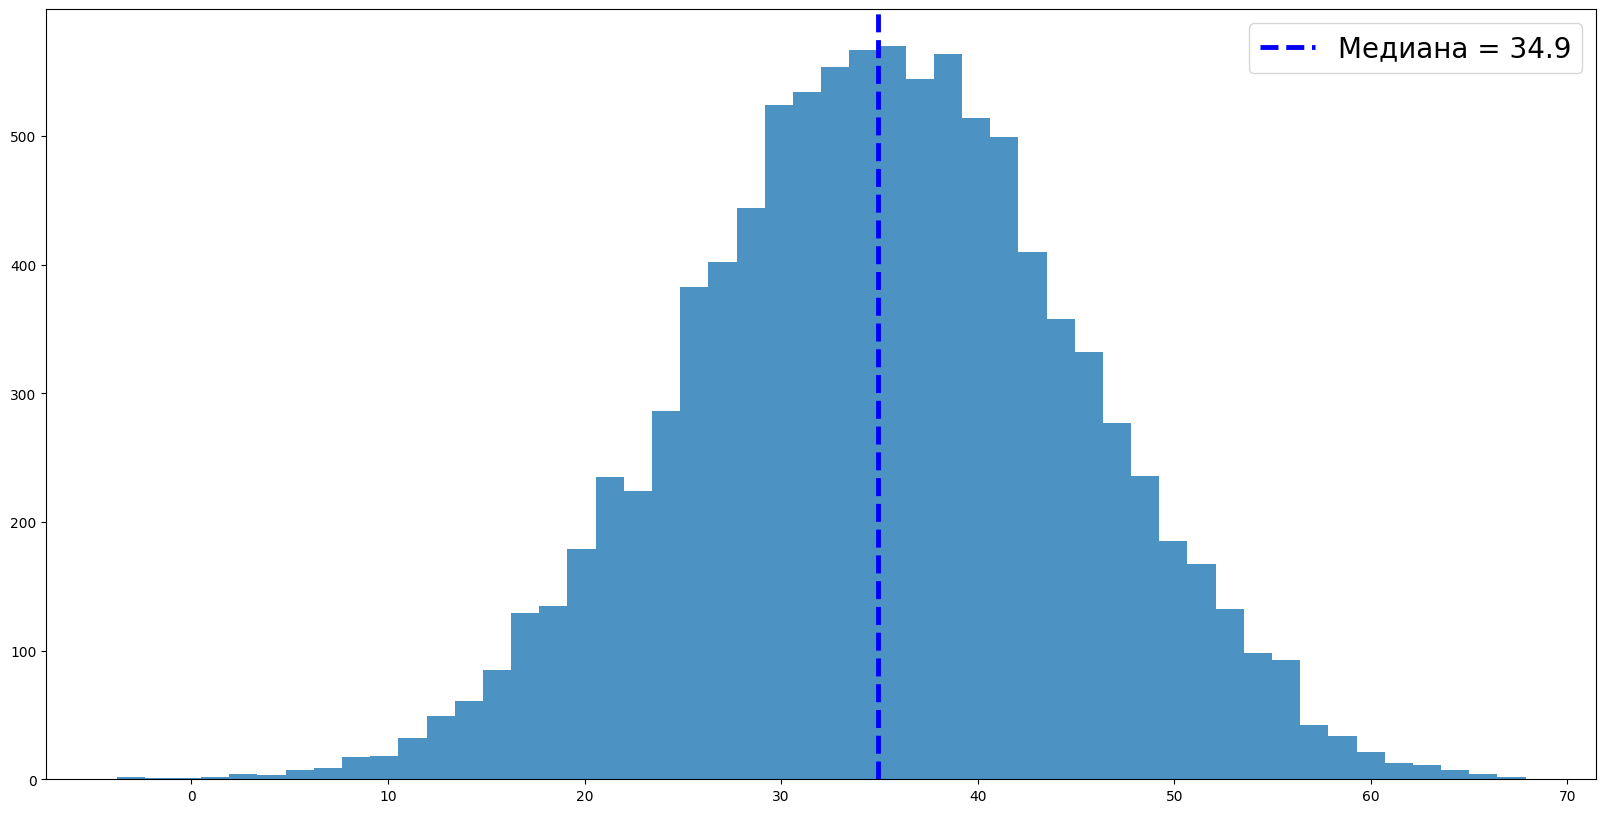

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = plt.subplot(111)
plt.hist(gen_pop, 50, alpha=0.8)
line1 = plt.axvline(median_ln, label=('Медиана = ' + str(round(median_ln, 1))),
                    color='blue', linestyle='dashed', linewidth=3.5)

ax1.legend(handles=[line1], fontsize=20)
plt.show()

**Мода** - значение во множестве наблюдений, которое встречается наиболее часто

In [ ]:
dscrt_lst = np.random.randint(0, 100, size = 1000)

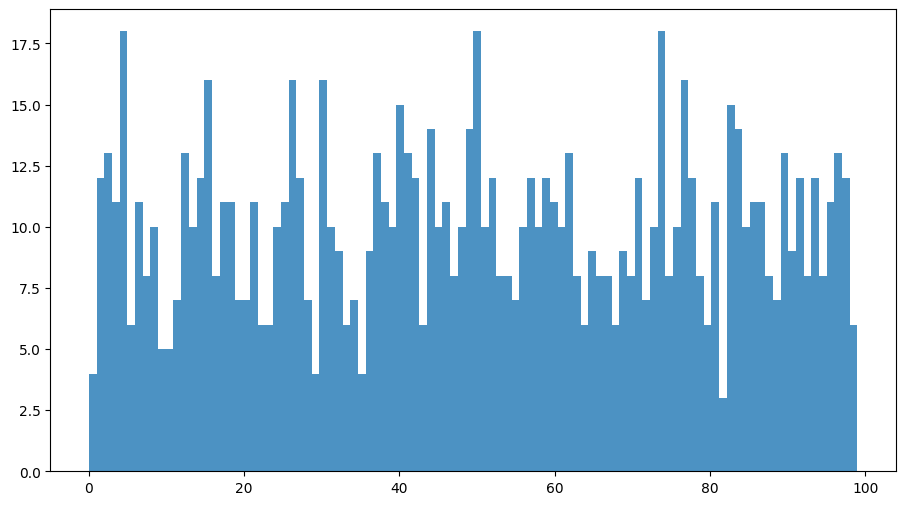

In [ ]:
fig = plt.figure(figsize=(24, 6))

ax1 = plt.subplot(121)
plt.hist(dscrt_lst, 100, alpha=0.8)
plt.show()

In [ ]:
mode = stats.mode(dscrt_lst)
mode

ModeResult(mode=4, count=18)

**Квантиль** - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называет процентилем или перцентилем

In [ ]:
np.percentile(gen_pop, 75)
stats.scoreatpercentile(gen_pop, 75)

41.836611373999276

In [ ]:
df_box_plot = pd.DataFrame()
df_box_plot['gen_pop'] = gen_pop
df_box_plot['gen_pop_ln'] = gen_pop_ln

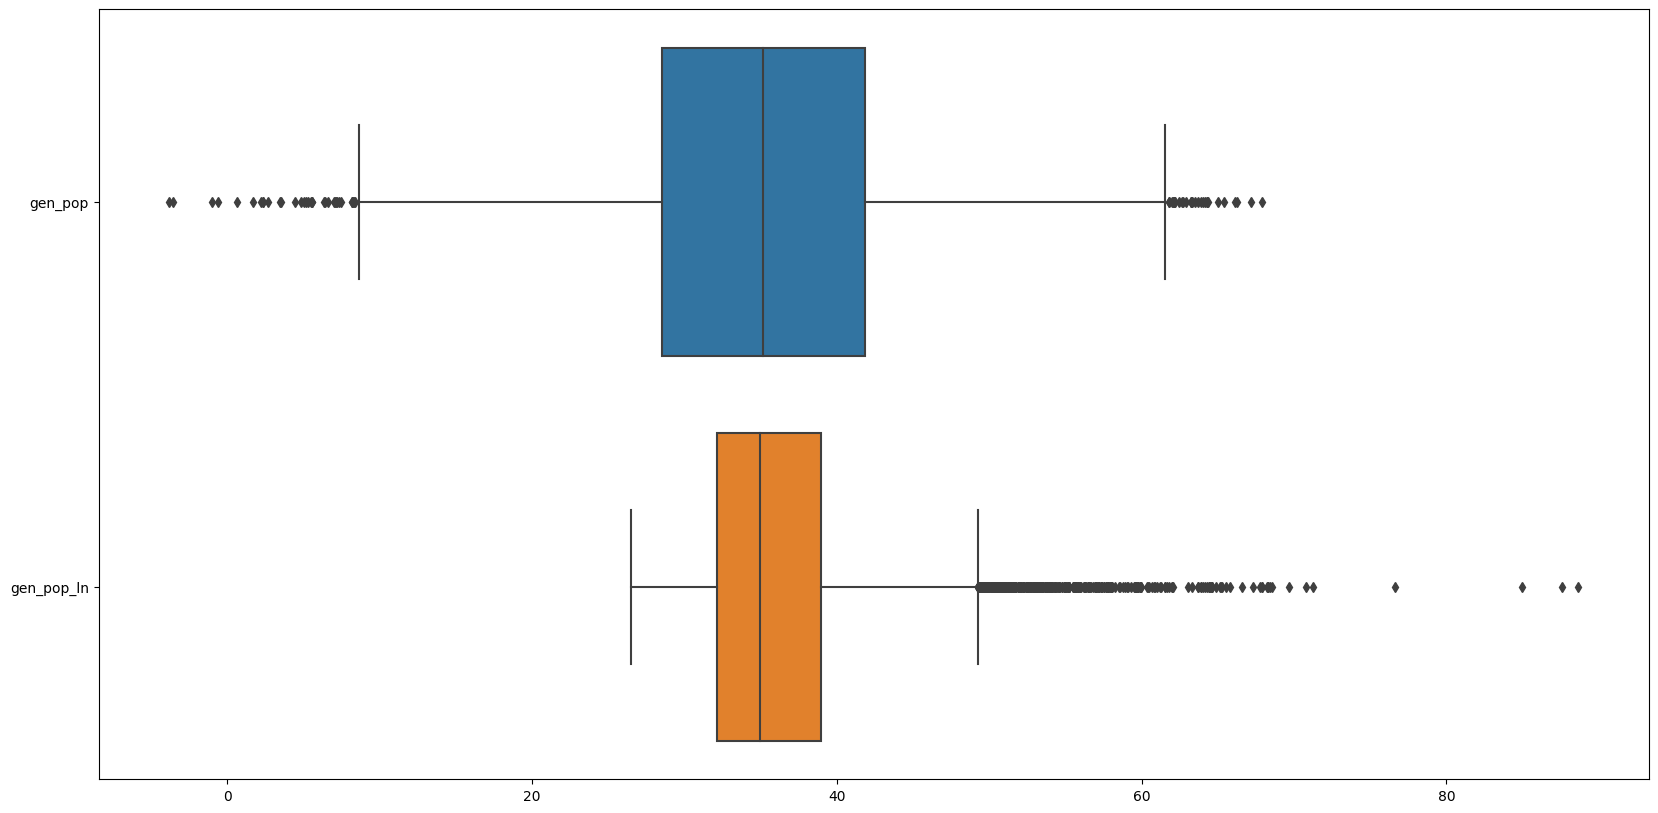

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.boxplot(data=df_box_plot, orient="h")
plt.show()

# Среднее арифметическое

In [14]:
mean = np.mean(gen_pop)
mean

35.16126460047198

При работе с выборкой меры концентрации начинают называться **выборочными**, потому что оценку **меры** мы производим **по выборке**

In [16]:
n = 20
sample = np.random.choice(gen_pop, n, replace = False)

In [30]:
sample_mean = np.mean([85, 90, 78, 92, 88, 85, 76, 98, 94, 87])
sample_mean

87.3

# Меры разброса
Для генеральной совокупности данных:
дисперсия, среднеквадратическое отклонение

In [18]:
# дисперсия
var_ = np.var(gen_pop)
# среднеквадратическое отклонение
std_ = np.std(gen_pop)

In [21]:
var_
std_

99.03830444979266

оценка среднеквадратического отклонения через **выборочное среквадратичное отклонение**

In [28]:
std_sample = np.std([85, 90, 78, 92, 88, 85, 76, 98, 94, 87],
                    ddof = 1)
std_sample

6.783149055645992

In [27]:
iterations = 1000
n = 20

std_sample_l = []
std_sample_l_corrected = []

for i in range(iterations):
  sample = np.random.choice(gen_pop, n, replace = False)
  sample
  std_sample = np.std(sample)
  std_sample_corrected = np.std(sample, ddof = 1)

  std_sample_l.append(std_sample)
  std_sample_l_corrected.append(std_sample_corrected)
sample

array([57.32260509, 39.87689037, 28.60538415, 22.96062349, 39.27961474,
       30.78734317, 33.03891468, 31.96135097, 17.97732845, 43.16593927,
       32.56261762, 24.35597696, 39.18326674, 25.49156557, 48.70478847,
       37.89430057, 17.72322852, 18.04804014, 45.50848019, 30.69904309])

In [ ]:
iterations = 1000
n = 20

std_sample_l = []
std_sample_l_corrected = []

for i in range(iterations):
  sample = np.random.choice(gen_pop, n, replace = False)
  sample
  std_sample = np.std(sample)
  std_sample_corrected = np.std(sample, ddof = 1)

  std_sample_l.append(std_sample)
  std_sample_l_corrected.append(std_sample_corrected)